### Name: Bhavesh Kewalramani
### Roll No.: A-25
### Section: A
### Semester: V
### Shift: I
### Batch: A1

# Part-A Linear Regression

#### 1. Consider a set of points x and the predicted values y as given below:

#### x = 0  2  3  5  6    7    8  8   9   10
#### y = 2  4  5  6  7.5  8.5  9  10  11  12

#### (a) Plot the data.

#### (b) Use LinearRegression model from sklearn library to perform linear regression.

#### (c) Consider a data value for x and predict the value of y using the above model.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Part_A.csv')
data = data[['X','Y']]
data.columns=['X','Y']
data.head()

,X,Y
0,0,2.0
1,2,4.0
2,3,5.0
3,5,6.0
4,6,7.5


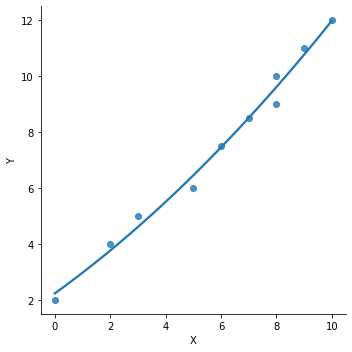

In [3]:
sns.lmplot(x='X',y='Y',data=data,order=2,ci=None)

In [4]:
x=np.array(data['X']).reshape(-1,1)
y=np.array(data['Y']).reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [5]:
linear_regression = LinearRegression()

In [6]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [7]:
linear_regression.score(x_test,y_test)

0.9791748557542823

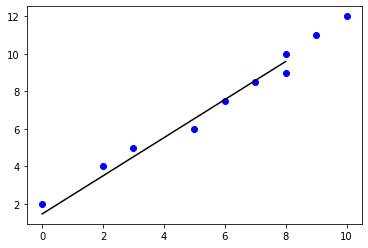

In [8]:
y_pred=linear_regression.predict(x_test)
plt.scatter(x,y,color='b')
plt.plot(x_test,y_pred, color='k')
plt.show()

#### 2. The given table shows the midterm and final exam grades obtained for students in a database course.

#### X [midterm exam]  =  72  50  81  74  94  86  59  83  65  33  88  81
#### Y [Final Exam]       =   84  63  77  78  90  75  49  79  77  52  74  90

#### (a) Plot the data. Do x and y seem to have a linear relationship?

#### (b) Use the method of least squares to find an equation for the prediction of a student’s final exam grade based on the student’s midterm grade in the course. Write a function in python to compute the coefficients and equation. [Do not use the inbuild library method.]

#### (c) Also show the plot with the datapoints and the obtained linear equation line.

#### (d) Predict the final exam grade of student who received an 86 in the midterm exam based on the equation of least squares.


In [9]:
data = pd.read_csv('Part_A2.csv')
data = data[['X','Y']]
data.columns=['X','Y']
data.head()

,X,Y
0,72,84
1,50,63
2,81,77
3,74,78
4,94,90


In [10]:
x = list(data['X'])
y = list(data['Y'])

def least_square(data):
    x_ = sum(data['X'])/len(data['X'])
    y_ = sum(data['Y'])/len(data['Y'])
    
    x = list(data['X'])
    y = list(data['Y'])
    xy=[]
    x_sq = []
    x1 = []
    y1 = []
    
    for i in range(len(x)):
        x1.append(x[i] - x_)
        y1.append(y[i] - y_)
        xy.append(x1[i]*y1[i])
        x_sq.append(x1[i]*x1[i])
    
    b1 = sum(xy)/sum(x_sq)
    b0 = y_ - (b1 * x_)
    
    return b0,b1
    
def predict(b0,b1,x):
    return b1 * x + b0

b0,b1 = least_square(data)

y_pred=[]
for i in range(len(x)):
    y_pred.append(predict(b0,b1,x[i]))

print(y_pred)

[73.90306665376801, 61.107864951146354, 79.13746735029505, 75.0662668085518, 86.69826835638966, 82.04546773725451, 66.3422656476734, 80.30066750507885, 69.83186611202476, 51.22066363548417, 83.2086678920383, 79.13746735029505]


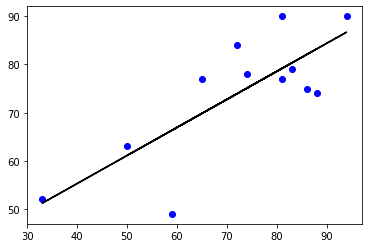

In [11]:
plt.scatter(data['X'],data['Y'],color='b')
plt.plot(data['X'],y_pred,color='k')
plt.show()

In [12]:
print(predict(b0,b1,86))

82.04546773725451


#### 3. Perform Multiple Linear regression on cars.csv dataset.
#### (a) Analyse each column of the datset using appropriate visualization technique.
#### (b) Consider only weight and volume columns as multiple variables to predict the CO2 emission.
#### (c) Predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300ccm. Also conclude about the obtained result.
#### (d) Perform prediction on few more values.
#### (e) Show the coefficient obtained and conclude.

In [13]:
dataset = pd.read_csv('cars.csv')

In [14]:
dataset.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [15]:
dataset.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [16]:
cor = dataset.corr()
cor

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


<AxesSubplot:>

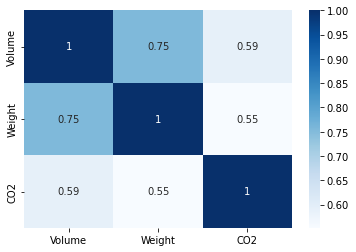

In [17]:
sns.heatmap(cor,annot=True,cmap='Blues')

In [18]:
x=dataset[['Weight','Volume']]
y=dataset['CO2']

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
multiple_regression = LinearRegression()
multiple_regression.fit(x,y)

LinearRegression()

In [21]:
predictedCO2 = multiple_regression.predict([[2300,1300]])
print(predictedCO2)

[107.2087328]


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
predictedCO2 = multiple_regression.predict([[6300,1300]])
print(predictedCO2)

[137.41252188]


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
predictedCO2 = multiple_regression.predict([[230,1300]])
print(predictedCO2)

[91.57827195]


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
predictedCO2 = multiple_regression.predict([[2300,13]])
print(predictedCO2)

[97.16336636]


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
predictedCO2 = multiple_regression.predict([[234555,135555]])
print(predictedCO2)

[2908.84884045]


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
predictedCO2 = multiple_regression.predict([[2,1]])
print(predictedCO2)

[79.71762644]


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
print("Coeficient [Weight, Volume]")
print(multiple_regression.coef_)

Coeficient [Weight, Volume]
[0.00755095 0.00780526]


These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g. And if the engine size (Volume) increases by 1 ccm, the CO2 emission increases by 0.00780526 g.

#### 4. Perform linear regression on the dataset [use dataset: kc_house_data.csv]
#### (a) Load the dataset, display it, visualize various columns and explain the dataset composition
#### (b) Describe the dataset
#### (c) Houses with how many bedrooms are most sold?
#### (d) Visualizing the location of the houses based on latitude and longitude. Use appropriate plot.
#### (e) Find the correlated features/ columns
#### (f) Find null values and fill with mean value for all columns
#### (g) Find dependant and independent data (place in X and y)
#### (h) Split train and test data
#### (i) Train the model and test it. Find the accuracy.
#### (j) Test the model using some arbitrary input.

In [28]:
dataset = pd.read_csv('kc_house_data.csv')

In [29]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [31]:
dataset.shape

(21613, 21)

In [32]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
dataset['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [34]:
dataset['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [35]:
dataset['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [36]:
dataset['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

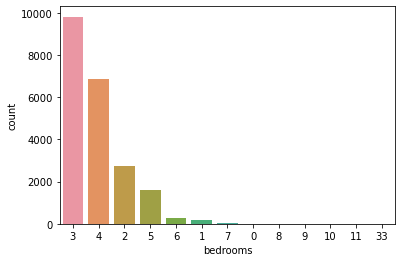

In [37]:
#countplot for bedrooms
sns.countplot(dataset.bedrooms,order=dataset['bedrooms'].value_counts().index)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'House Prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

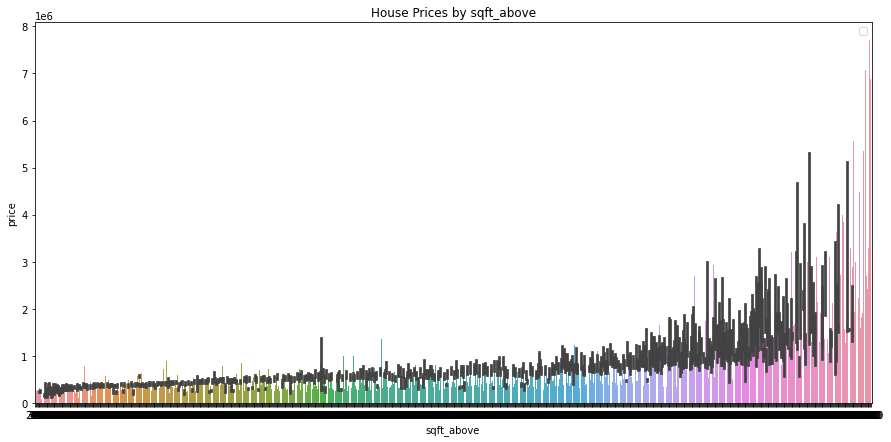

In [38]:
#barplot between sqft_above and prices
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,7))
plt.title("House Prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=dataset)

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <BarContainer object of 5 artists>)

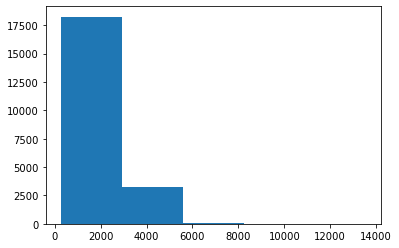

In [39]:
#Histogram for sqft_living
plt.hist('sqft_living',data=dataset,bins=5)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

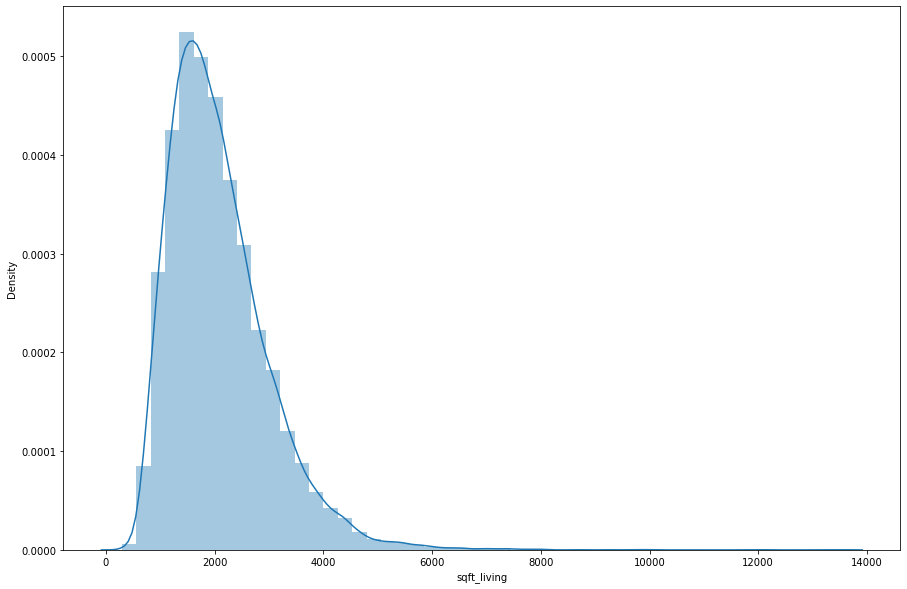

In [40]:
#distplot for sqft_living
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(dataset['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

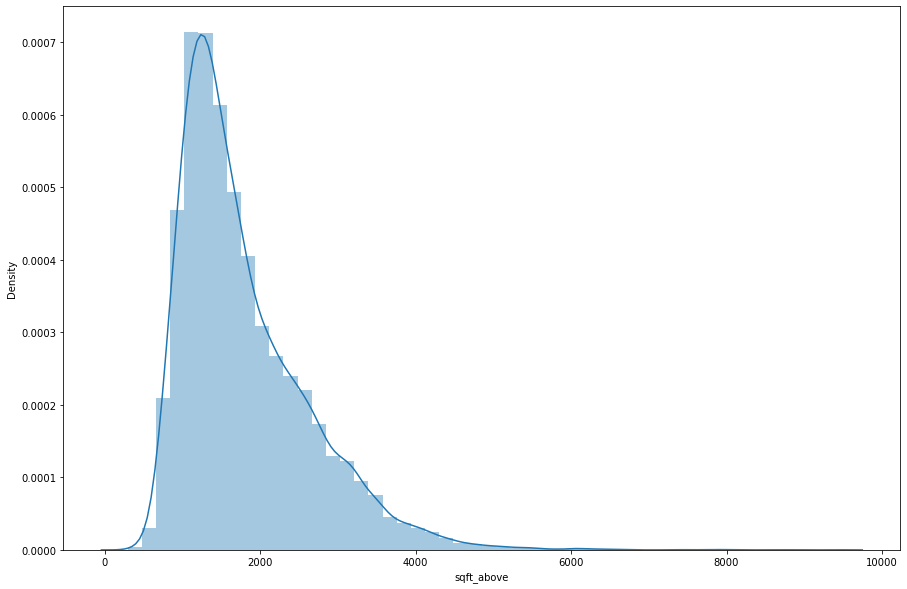

In [41]:
#distplot for sqft_above
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(dataset['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)

<AxesSubplot:>

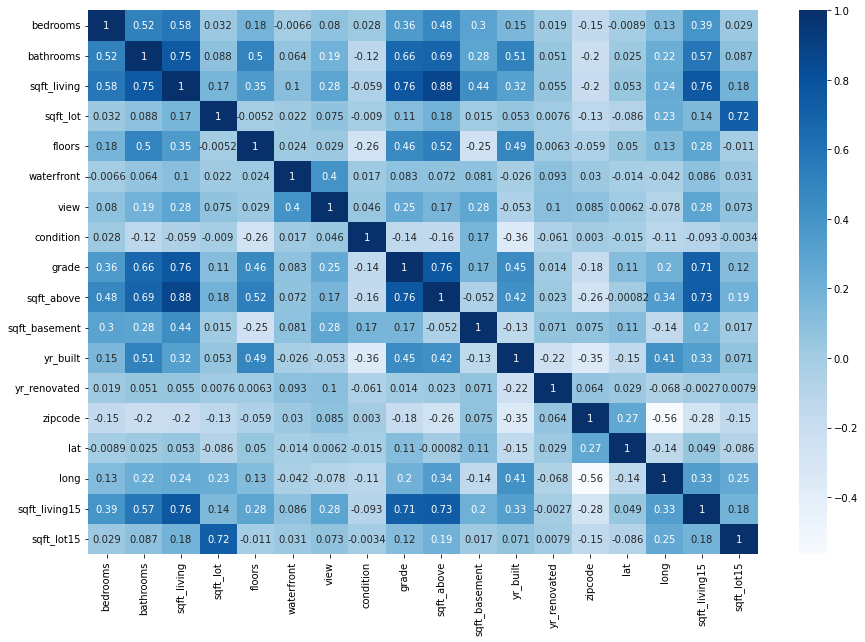

In [42]:
dataset2=dataset.drop(columns=['id','price'])

_,ax=plt.subplots(figsize=(15,10))
sns.heatmap(dataset2.corr(),annot=True,cmap='Blues')

In [43]:
dataset2.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
dataset2['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Houses with 3 bedrooms are most sold

<AxesSubplot:xlabel='long', ylabel='lat'>

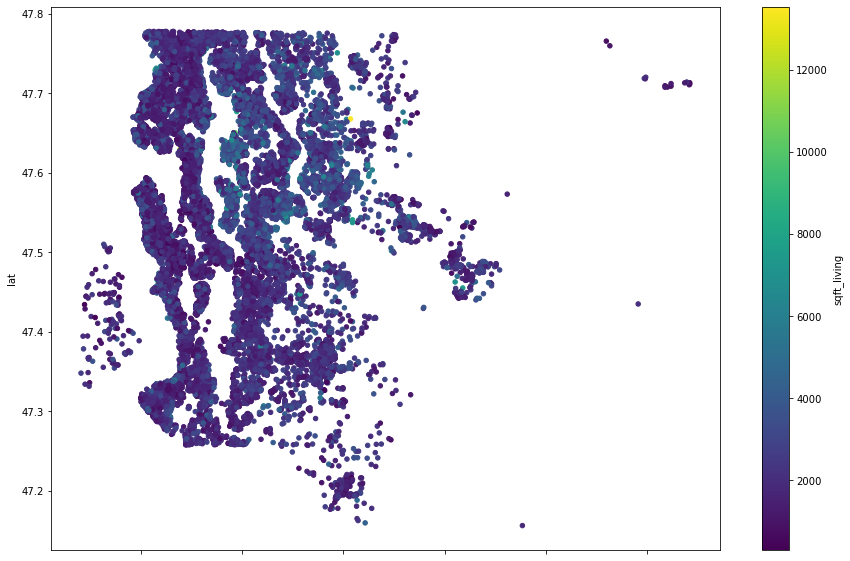

In [45]:
dataset.plot.scatter('long','lat',c='sqft_living',colormap='viridis',figsize=(15,10))

<AxesSubplot:xlabel='long', ylabel='lat'>

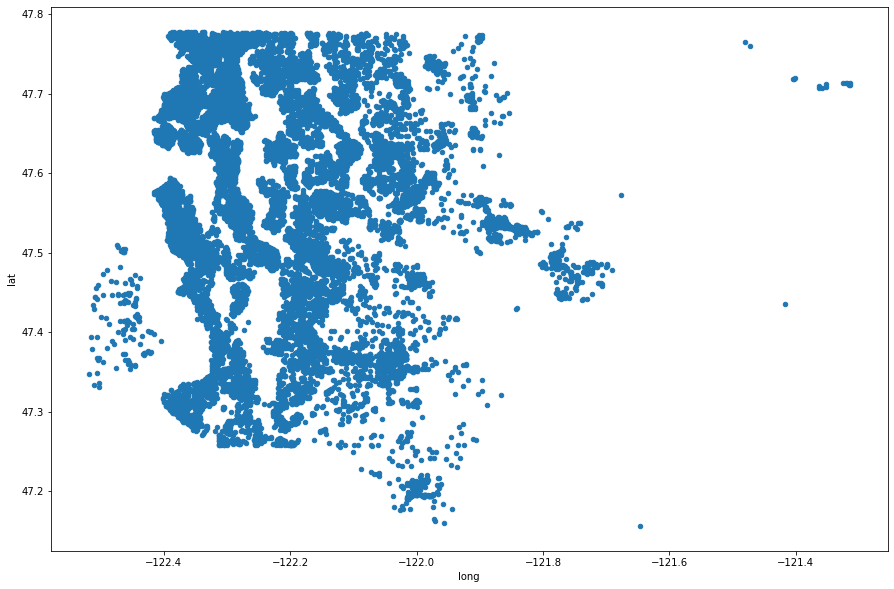

In [46]:
dataset.plot.scatter('long','lat',colormap='viridis',figsize=(15,10))

In [47]:
dataset2.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


In [48]:
dataset2.corr().columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [49]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [50]:
dataset.fillna(dataset.mean())

C:\Users\bhave\AppData\Local\Temp/ipykernel_56084/3872105471.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean())


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [51]:
date = dataset['date']
dataset['month_sold'] = date.str[4:6]
dataset['month_sold'] = dataset['month_sold'].astype('int64')
dataset['year_sold'] = date.str[:4]
dataset['year_sold'] = dataset['year_sold'].astype('int64')

dataset.drop(columns=['date'],axis=1,inplace=True)

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [53]:
dataset['age'] = 2022 - dataset.yr_built
dataset = dataset.drop(columns=['yr_built'], axis=1)

In [54]:
dataset.yr_renovated.fillna(0.0, inplace=True)
dataset['renovated'] = dataset.year_sold - dataset.yr_renovated
age = dataset.age.values
# values = np.where(renovated <= 10, 1, 0)
# dataset['renovated'] = np.where(age <= 5, 1, values)
dataset.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [55]:
X=dataset.drop(columns=['price','id'],axis=1)
y=dataset.price

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,test_size=0.25)

In [57]:
y_test.shape

(5404,)

In [58]:
from sklearn.linear_model import LinearRegression

multiple_regression = LinearRegression()
multiple_regression.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred=multiple_regression.predict(X_test)
y_pred.shape

(5404,)

In [60]:
train_score = multiple_regression.score(X_train, y_train)
test_score = multiple_regression.score(X_test, y_test)
print('Training Score:', round(train_score, 2))
print('Test Score:', round(test_score, 2))
print('Coefficients:', multiple_regression.coef_)

Training Score: 0.7
Test Score: 0.7
Coefficients: [-3.43521721e+04  4.45483133e+04  1.10802749e+02  1.08531700e-01
  7.91250981e+03  5.90889471e+05  4.60870122e+04  2.69339615e+04
  9.86128466e+04  7.01702988e+01  4.06324498e+01 -5.23583184e+02
  5.99301288e+05 -2.03891154e+05  1.68034212e+01 -3.73789829e-01
  1.36966716e+03  3.52434799e+04  2.67175490e+03 -1.93672949e+01]


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  month_

In [62]:
price = multiple_regression.predict([[5,5.0,2000,6000,7.0,1,1,7,11,2000,5,100000,50.5112,-130.257,1500,5000,11,2012,70,2022]])

C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
print(price)

[4066892.40025239]
